# Actividad Final MIA05

Integrantes:

Juan Carlos Muñoz Esquivel.
María Delina Culebro Farrera.
Aline Hernandez Garcia.
Miguel Ángel Tamer Meyer.
Aurora Correa Flores.


Librerías

In [146]:
import torch
torch.__version__

'2.2.2+cpu'

In [147]:

import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Importando conjunto de datos.

In [148]:
#cargando conjuntos de datos
breast = datasets.load_breast_cancer()
#ver lo datos
breast.data


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [149]:
#nombre de las columnas
breast.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [150]:
#Para observar los objetivos tenemos dos clases 0 y 1
breast.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [151]:
#nombres de las clases
breast.target_names

array(['malignant', 'benign'], dtype='<U9')

In [152]:
inputs = breast.data
#569 instancias y 30 columnas
inputs.shape

(569, 30)

In [153]:
outputs = breast.target
#569 intancias
outputs.shape

(569,)

In [154]:
#partir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.25)

In [155]:
X_train.shape

(426, 30)

In [156]:
#25% de los datos que vamos a probar
X_test.shape

(143, 30)

Transformación de los datos

In [157]:
type(X_train)
# Se necesita cambiar de numpy.ndarray a pytorch Tensor

numpy.ndarray

In [158]:
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)

In [159]:
type(X_train)

torch.Tensor

In [160]:
# Se convierte también el dataset
dataset = torch.utils.data.TensorDataset(X_train,y_train, )

In [161]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [162]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size = 10)

Structura de la Red Neuronal 

In [163]:
#(Inputs+Ouputs)/2 -> (30+1)/2 = 15.5 = 16
#30 -> 16 -> 16 -> 1
network = nn.Sequential(nn.Linear(in_features=30,out_features=16),
                        nn.Sigmoid(),
                        nn.Linear(16, 16),
                        nn.Sigmoid(),
                        nn.Linear(16, 1),
                        nn.Sigmoid())



In [164]:
network.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [165]:
# Si tenemos un error binario podemos usar BCELoss Binary Cross Entropy para calcularlo
loss_function = nn.BCELoss() 

In [166]:
#Creación del optimizador que actualiza los pesos y la tasa de aprendizaje
optimizer = torch.optim.Adam(network.parameters(), lr = 0.001) 

Entrenamiento

In [167]:
epochs =100
for epoch in range(epochs):
    running_loss= 0. # Está variable guarda el valor en orden para imprimir después de cada uno de los epochs
    
    #ir para cada instancias
    for data in train_loader:
        inputs, outputs = data #crea entradas y salidas
        #print(inputs)
        #print('-----')
        #print(outputs)
        #reset el Gradiante después de cada grupo de 10 instancias
        optimizer.zero_grad() 
        
        #para las predicciones de esto toma cada grupo y la red neuronal va aplicar la función suma, la activación de la función, y optenemos la predicción en la capa de salida 
        predictions = network.forward(inputs)
        loss = loss_function(predictions.squeeze(), outputs) #removiendo la dimension extra de las salidas esperadas del conjunto de datos
        loss.backward() #función para la propagación de hacia atrás
        optimizer.step() # Actualización de los pesos
        
        #Aquí se calcula el error por cada uno de los grupos
        running_loss += loss.item()
        #Se imprimen los resultados en orden de obtener un promedio
    print('Epoch: ' + str(epoch + 1) + ' loss: ' + str(running_loss / len(train_loader)))

Epoch: 1 loss: 0.6656530346981314
Epoch: 2 loss: 0.6594755330751109
Epoch: 3 loss: 0.6555192512135173
Epoch: 4 loss: 0.6512381711671519
Epoch: 5 loss: 0.6471919154011926
Epoch: 6 loss: 0.6433864263601081
Epoch: 7 loss: 0.6383848758630974
Epoch: 8 loss: 0.6333011652148047
Epoch: 9 loss: 0.6264784044997637
Epoch: 10 loss: 0.6181749202484308
Epoch: 11 loss: 0.6114205343778744
Epoch: 12 loss: 0.6012195501216623
Epoch: 13 loss: 0.5900758449421373
Epoch: 14 loss: 0.5781604398128598
Epoch: 15 loss: 0.5655489591665046
Epoch: 16 loss: 0.5518563985824585
Epoch: 17 loss: 0.5430810278238252
Epoch: 18 loss: 0.5242859145929647
Epoch: 19 loss: 0.5091965912386428
Epoch: 20 loss: 0.4930569515671841
Epoch: 21 loss: 0.4845585663651311
Epoch: 22 loss: 0.46706762632658316
Epoch: 23 loss: 0.44601795909016634
Epoch: 24 loss: 0.43179740323576815
Epoch: 25 loss: 0.41568222434021707
Epoch: 26 loss: 0.4035121375738188
Epoch: 27 loss: 0.38854923844337463
Epoch: 28 loss: 0.37778003028658935
Epoch: 29 loss: 0.36810

Evaluación

In [168]:
network.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [169]:
X_test.shape

(143, 30)

In [170]:
type(X_test)

numpy.ndarray

In [171]:
#Convirtiendo de tipo numpy a tensor
X_test = torch.tensor(X_test, dtype=torch.float)
type(X_test)

torch.Tensor

In [172]:
predictions = network.forward(X_test)
predictions

tensor([[0.0826],
        [0.0826],
        [0.0826],
        [0.0826],
        [0.9689],
        [0.0826],
        [0.9686],
        [0.9689],
        [0.0826],
        [0.0826],
        [0.9687],
        [0.0826],
        [0.9688],
        [0.9688],
        [0.9686],
        [0.9688],
        [0.9686],
        [0.0826],
        [0.9247],
        [0.0826],
        [0.9689],
        [0.0866],
        [0.9686],
        [0.9689],
        [0.9686],
        [0.0826],
        [0.9414],
        [0.0826],
        [0.0826],
        [0.9689],
        [0.9685],
        [0.9621],
        [0.0826],
        [0.9689],
        [0.9279],
        [0.1644],
        [0.9689],
        [0.0826],
        [0.0826],
        [0.9688],
        [0.9689],
        [0.9200],
        [0.0826],
        [0.9679],
        [0.0826],
        [0.0826],
        [0.9688],
        [0.9686],
        [0.0826],
        [0.9688],
        [0.9195],
        [0.6386],
        [0.9515],
        [0.2814],
        [0.8191],
        [0

In [173]:
#transformación de la predicciones
predictions = np.array(predictions > 0.5)
predictions

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [

In [174]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [175]:
accuracy_score(y_test, predictions)

0.9230769230769231

In [176]:
cm = confusion_matrix(y_test, predictions)
cm

array([[46,  4],
       [ 7, 86]], dtype=int64)

<Axes: >

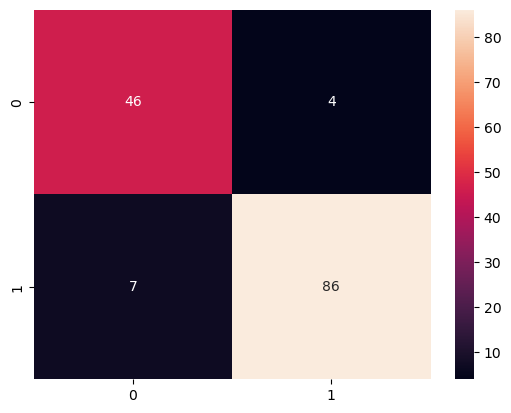

In [177]:
import seaborn as sns
sns.heatmap(cm, annot=True)

Red Neuronal Convolucional

In [137]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.transforms as T
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_sample_images


Conjunto de datos Datos

In [138]:
#cargando conjuntos de datos
breast= datasets.load_breast_cancer()
#ver lo datos
breast.data


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [202]:
print(breast.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [209]:
print(breast.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [139]:
NUM_TRAIN = 426
NUM_VAL = 143
NUM_TEST = 143
MINIBATCH_SIZE = 16

transform_breast = T.Compose([T.ToTensor(),T.Normalize([0.491,0.482,0.447],[0.247,0.243,0.261])])
test_loader = DataLoader(X_test, batch_size=MINIBATCH_SIZE,sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(X_test))))

Mostrar Imagenes


In [219]:
    plt.show(transform_breast)